<a href="https://colab.research.google.com/github/SasitornC/LAGCC-Python_Project/blob/main/Python_Project_3_NYPD_Arrest_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline


In [ ]:
df = pd.read_csv('NYPD_Arrest_Data__Year_to_Date_.csv')
df

,ARREST_KEY,ARREST_DATE,PD_CD,PD_DESC,KY_CD,OFNS_DESC,LAW_CODE,LAW_CAT_CD,ARREST_BORO,ARREST_PRECINCT,JURISDICTION_CODE,AGE_GROUP,PERP_SEX,PERP_RACE,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,New Georeferenced Column,Community Districts,Borough Boundaries,City Council Districts,Police Precincts,Zip Codes
0,234233843,09/29/2021,105.0,STRANGULATION 1ST,106.0,FELONY ASSAULT,PL 1211200,F,B,42,0,25-44,M,BLACK,1009231,240290,40.826189,-73.909738,POINT (-73.90973778899996 40.82618898100003),34.0,5.0,43.0,25.0,10934.0
1,234129823,09/27/2021,157.0,RAPE 1,104.0,RAPE,PL 1303501,F,K,77,0,25-44,M,BLACK,1003606,185050,40.674583,-73.930222,POINT (-73.93022154099998 40.67458330800008),16.0,2.0,49.0,49.0,17615.0
2,234040747,09/25/2021,109.0,"ASSAULT 2,1,UNCLASSIFIED",106.0,FELONY ASSAULT,PL 1200501,F,Q,101,0,25-44,M,BLACK,1049232,159210,40.603441,-73.765986,POINT (-73.76598558899997 40.60344094100003),51.0,3.0,47.0,59.0,20529.0
3,234047720,09/25/2021,101.0,ASSAULT 3,344.0,ASSAULT 3 & RELATED OFFENSES,PL 1200001,M,B,44,0,25-44,M,BLACK,1006537,244511,40.837782,-73.919458,POINT (-73.91945797099999 40.83778161800007),50.0,5.0,42.0,27.0,10930.0
4,234042526,09/25/2021,101.0,ASSAULT 3,344.0,ASSAULT 3 & RELATED OFFENSES,PL 1200001,M,B,44,0,25-44,M,BLACK,1007418,243859,40.835990,-73.916276,POINT (-73.91627635999998 40.83598980000005),50.0,5.0,42.0,27.0,10934.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115294,222689440,01/06/2021,109.0,"ASSAULT 2,1,UNCLASSIFIED",106.0,FELONY ASSAULT,PL 1200501,F,Q,102,0,18-24,M,ASIAN / PACIFIC ISLANDER,1031076,193779,40.698440,-73.831130,POINT (-73.83112953899997 40.69843969400005),46.0,3.0,28.0,60.0,24014.0
115295,222626401,01/05/2021,109.0,"ASSAULT 2,1,UNCLASSIFIED",106.0,FELONY ASSAULT,PL 1200502,F,B,49,0,25-44,M,BLACK HISPANIC,1027430,251105,40.855803,-73.843910,POINT (-73.84390995399998 40.85580274300003),59.0,5.0,12.0,32.0,11270.0
115296,222477062,01/01/2021,922.0,"TRAFFIC,UNCLASSIFIED MISDEMEAN",348.0,VEHICLE AND TRAFFIC LAWS,VTL0511001,M,B,50,0,25-44,M,WHITE HISPANIC,1011047,256269,40.870041,-73.903112,POINT (-73.90311219699998 40.870041281000056),48.0,5.0,29.0,33.0,11606.0
115297,222728174,01/07/2021,339.0,"LARCENY,PETIT FROM OPEN AREAS,",341.0,PETIT LARCENY,PL 1552500,M,Q,114,0,25-44,M,WHITE HISPANIC,1007694,219657,40.769561,-73.915363,POINT (-73.91536344699995 40.76956124200007),39.0,3.0,4.0,72.0,16860.0


In [ ]:
#To check which rows and columns that has missing values or blank space.
df.head().isnull()

,ARREST_KEY,ARREST_DATE,PD_CD,PD_DESC,KY_CD,OFNS_DESC,LAW_CODE,LAW_CAT_CD,ARREST_BORO,ARREST_PRECINCT,JURISDICTION_CODE,AGE_GROUP,PERP_SEX,PERP_RACE,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,New Georeferenced Column,Community Districts,Borough Boundaries,City Council Districts,Police Precincts,Zip Codes
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [ ]:
#Renaming and replacing column
df.rename(columns={"ARREST_KEY":"ARREST_ID","PERP_SEX" : "GENDER"})


,ARREST_ID,ARREST_DATE,PD_CD,PD_DESC,KY_CD,OFNS_DESC,LAW_CODE,LAW_CAT_CD,ARREST_BORO,ARREST_PRECINCT,JURISDICTION_CODE,AGE_GROUP,GENDER,PERP_RACE,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,New Georeferenced Column,Community Districts,Borough Boundaries,City Council Districts,Police Precincts,Zip Codes
0,234233843,09/29/2021,105.0,STRANGULATION 1ST,106.0,FELONY ASSAULT,PL 1211200,F,B,42,0,25-44,M,BLACK,1009231,240290,40.826189,-73.909738,POINT (-73.90973778899996 40.82618898100003),34.0,5.0,43.0,25.0,10934.0
1,234129823,09/27/2021,157.0,RAPE 1,104.0,RAPE,PL 1303501,F,K,77,0,25-44,M,BLACK,1003606,185050,40.674583,-73.930222,POINT (-73.93022154099998 40.67458330800008),16.0,2.0,49.0,49.0,17615.0
2,234040747,09/25/2021,109.0,"ASSAULT 2,1,UNCLASSIFIED",106.0,FELONY ASSAULT,PL 1200501,F,Q,101,0,25-44,M,BLACK,1049232,159210,40.603441,-73.765986,POINT (-73.76598558899997 40.60344094100003),51.0,3.0,47.0,59.0,20529.0
3,234047720,09/25/2021,101.0,ASSAULT 3,344.0,ASSAULT 3 & RELATED OFFENSES,PL 1200001,M,B,44,0,25-44,M,BLACK,1006537,244511,40.837782,-73.919458,POINT (-73.91945797099999 40.83778161800007),50.0,5.0,42.0,27.0,10930.0
4,234042526,09/25/2021,101.0,ASSAULT 3,344.0,ASSAULT 3 & RELATED OFFENSES,PL 1200001,M,B,44,0,25-44,M,BLACK,1007418,243859,40.835990,-73.916276,POINT (-73.91627635999998 40.83598980000005),50.0,5.0,42.0,27.0,10934.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115294,222689440,01/06/2021,109.0,"ASSAULT 2,1,UNCLASSIFIED",106.0,FELONY ASSAULT,PL 1200501,F,Q,102,0,18-24,M,ASIAN / PACIFIC ISLANDER,1031076,193779,40.698440,-73.831130,POINT (-73.83112953899997 40.69843969400005),46.0,3.0,28.0,60.0,24014.0
115295,222626401,01/05/2021,109.0,"ASSAULT 2,1,UNCLASSIFIED",106.0,FELONY ASSAULT,PL 1200502,F,B,49,0,25-44,M,BLACK HISPANIC,1027430,251105,40.855803,-73.843910,POINT (-73.84390995399998 40.85580274300003),59.0,5.0,12.0,32.0,11270.0
115296,222477062,01/01/2021,922.0,"TRAFFIC,UNCLASSIFIED MISDEMEAN",348.0,VEHICLE AND TRAFFIC LAWS,VTL0511001,M,B,50,0,25-44,M,WHITE HISPANIC,1011047,256269,40.870041,-73.903112,POINT (-73.90311219699998 40.870041281000056),48.0,5.0,29.0,33.0,11606.0
115297,222728174,01/07/2021,339.0,"LARCENY,PETIT FROM OPEN AREAS,",341.0,PETIT LARCENY,PL 1552500,M,Q,114,0,25-44,M,WHITE HISPANIC,1007694,219657,40.769561,-73.915363,POINT (-73.91536344699995 40.76956124200007),39.0,3.0,4.0,72.0,16860.0


In [ ]:
#To check which column is unique key
df['ARREST_KEY'].is_unique

True

In [ ]:
#To Check starting and ending date
df['ARREST_DATE'].describe

<bound method NDFrame.describe of 0         09/29/2021
1         09/27/2021
2         09/25/2021
3         09/25/2021
4         09/25/2021
             ...    
115294    01/06/2021
115295    01/05/2021
115296    01/01/2021
115297    01/07/2021
115298    01/03/2021
Name: ARREST_DATE, Length: 115299, dtype: object>

**Arrested by Age Group**

In [ ]:
#Showing the total number of people who got arrested by age and race
df.groupby(['AGE_GROUP'])['PERP_RACE'].value_counts()

AGE_GROUP  PERP_RACE                     
18-24      BLACK                             11670
           WHITE HISPANIC                     5394
           BLACK HISPANIC                     2301
           WHITE                              1368
           ASIAN / PACIFIC ISLANDER           1040
           UNKNOWN                              86
           AMERICAN INDIAN/ALASKAN NATIVE       72
25-44      BLACK                             31523
           WHITE HISPANIC                    16894
           WHITE                              7466
           BLACK HISPANIC                     5933
           ASIAN / PACIFIC ISLANDER           3591
           UNKNOWN                             253
           AMERICAN INDIAN/ALASKAN NATIVE      186
45-64      BLACK                             11030
           WHITE HISPANIC                     5065
           WHITE                              3261
           ASIAN / PACIFIC ISLANDER           1496
           BLACK HISPANIC               

In [ ]:
df['AGE_GROUP'].count()

115299

In [ ]:
#The total of each age group that got arrested
df.groupby(['AGE_GROUP'])['PERP_RACE'].count().sort_values(ascending=False)

AGE_GROUP
25-44    65846
45-64    22438
18-24    21931
<18       3408
65+       1676
Name: PERP_RACE, dtype: int64

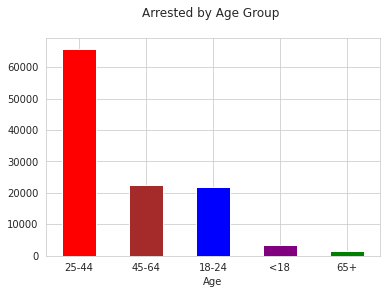

In [ ]:
df_group_age = df.groupby(['AGE_GROUP'])['PERP_RACE'].count().sort_values(ascending=False).plot(kind = 'bar', rot =0, color=['red','brown','blue','purple','green'])
plt.xlabel("Age")
plt.title("Arrested by Age Group ", y = 1.07)
plt.rc('font', size=10) 

**Arrested by Race**

In [ ]:
df.groupby(['PERP_RACE'])['ARREST_KEY'].count().sort_values(ascending=False)

PERP_RACE
BLACK                             57011
WHITE HISPANIC                    28355
WHITE                             12586
BLACK HISPANIC                    10208
ASIAN / PACIFIC ISLANDER           6389
UNKNOWN                             431
AMERICAN INDIAN/ALASKAN NATIVE      319
Name: ARREST_KEY, dtype: int64

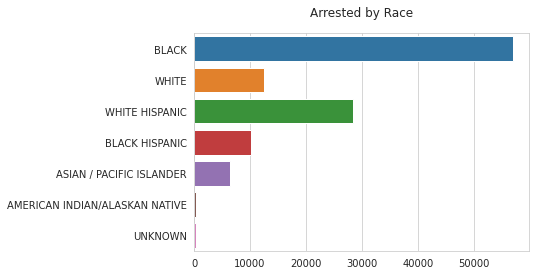

In [ ]:
sns.countplot(y='PERP_RACE', data = df)
plt.title("Arrested by Race", y = 1.05)
sns.set_style('whitegrid')
plt.ylabel("")
plt.xlabel("")
plt.rc('font', size=10) 

**Arrested by Gender**

In [ ]:
#To see how many people got arrested by gender
df['PERP_SEX'].value_counts()

M    95849
F    19450
Name: PERP_SEX, dtype: int64

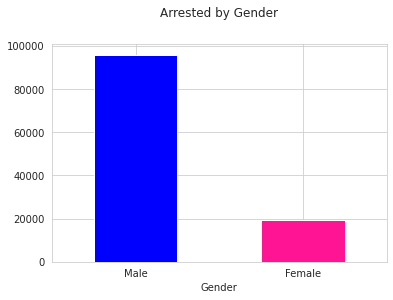

In [ ]:
df_gender_id = df.groupby(['PERP_SEX'])['ARREST_KEY'].count().sort_values(ascending=False).plot(kind='bar', color=['blue', 'deeppink'], rot=0)
df['PERP_SEX'].replace(["M","F"], ["Male","Female"], inplace = True)
plt.xlabel("Gender")
plt.title('Arrested by Gender', y = 1.1)
plt.rc('font', size=13) 

**Borough of Arrest**

In [ ]:
#Change the short name to full name
df['ARREST_BORO'].replace(["B","S","Q", "K", "M"], ["Bronx","Staten Island","Queens", "Brooklyn", "Manhattan"], inplace = True)

In [ ]:
df['ARREST_BORO'].value_counts()

Brooklyn         31004
Manhattan        28948
Bronx            25312
Queens           24654
Staten Island     5381
Name: ARREST_BORO, dtype: int64

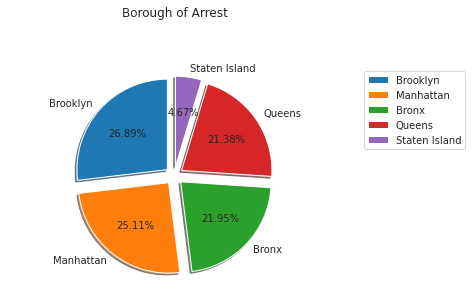

In [ ]:
labels = ['Brooklyn', 'Manhattan','Bronx','Queens','Staten Island']
sizes= [31004, 28948, 25312, 24654, 5381]
plt.pie(sizes,labels=labels, startangle=90, shadow=True,explode=(0.1, 0.1, 0.1, 0.1,0.1),autopct='%1.2f%%')
plt.axis('equal')
plt.title('Borough of Arrest', y = 1.2)
plt.legend(bbox_to_anchor = (1.05,1), loc='upper left')
plt.rc('font', size=10) 


**This analysis is from the data file name "NYPD Arrest date". It shows the people who get arrested from January 3th to December 29th of 2021. This analysis will focus on the age, race, and gender "NYPD Arrest Date" data file. Based on the data group age range, people aged between 24 to 44 have the highest number to 65,846 out of 115,200 the total people in the data file. The Black race is the most out of all the races who get arrested. The following race is White Hispanic, White, Black Hispanic, Asian, and American Indian which is the lowest number of arrested. To compare by gender, a male is shown to have more incidents than a  female gender high to 83%. The last analysis is the data Borough, this analyses focus on which borough has the most incident crime from the 5 boroughs. Brooklyn and Manhattan are the number one where people get arrested than other boroughs. The second is Bronx and Queens which is less than 3% difference and the lowest crime is Staten Island borough which has only 4.67%. This data has shown that Staten Island is the safest of the other 5 Boroughs. Brooklyn and Manhattan boroughs are the epicenters of attraction places and a lot of people go to work in these boroughs. These may cause high incident crime.**